# Get familiar with existing resources for sentiment analysis

### Load the JSON data as a dataframe for analysing

Load the coronavirus.jsonl file available at Aula Global

In [1]:
import pandas as pd
import json

# Load the JSON lines file as a dataframe
with open('coronavirus.jsonl') as f:
    lines = f.read().splitlines()
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']    
df_inter['json_element'].apply(json.loads)
df = pd.json_normalize(df_inter['json_element'].apply(json.loads))

# Keep only the tweets in English
df = df[df.lang=='en']

# Create URL field for tweets
df['url'] = 'https://twitter.com/_/status/'+df['id_str']

df.head(5)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.place_type,place.name,place.full_name,place.country_code,place.country,place.bounding_box.type,place.bounding_box.coordinates,retweeted_status.quoted_status.place,quoted_status.place,url
1,Tue Jan 05 18:26:45 +0000 2021,1346523549096357890,1346523549096357890,Surprise!!\nWHO Chief 'Very Disappointed' Chin...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/_/status/1346523549096357890
2,Tue Jan 05 18:26:45 +0000 2021,1346523548987367426,1346523548987367426,Researchers warn of brain damage from coronavi...,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",True,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/_/status/1346523548987367426
4,Tue Jan 05 18:26:46 +0000 2021,1346523551042576386,1346523551042576386,RT @WelshGovernment: In Wales we introduced na...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/_/status/1346523551042576386
5,Tue Jan 05 18:26:46 +0000 2021,1346523551210348548,1346523551210348548,RT @AyoCaesar: London alone has had thousands ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/_/status/1346523551210348548
6,Tue Jan 05 18:26:46 +0000 2021,1346523551722037249,1346523551722037249,RT @dbongino: Explosive new reporting about th...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/_/status/1346523551722037249


### Term Frequency (TF)

In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords  
nltk.download('stopwords')

# Extract tokens, generate count vectors and remove stopwords
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
word_vec = df['text'].apply(str.lower).apply(tokenizer.tokenize).apply(pd.value_counts).fillna(0)
word_vec = word_vec.drop(stopwords.words('english')+['https','co'], axis=1, errors='ignore').fillna(0)
word_vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,newsmax,surprise,mj,ibq,mel,experts,coronavirus,let,china,disappointed,...,cgtnamerica,mode,wartime,hebei,north,taken,mg,doctor,asking,johnboweactor
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


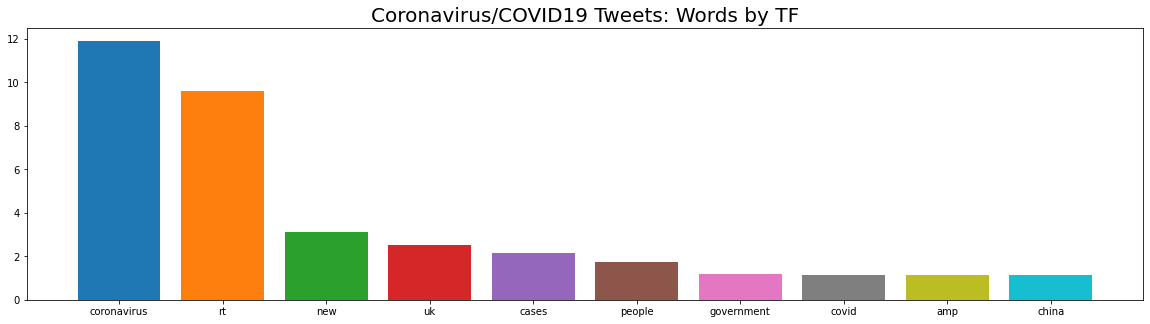

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)

tf_dict = {}
for column in tf:  tf_dict[column] = tf[column].sum()
tf_words = sorted(tf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tf_words]
values = [w[1] for w in tf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
cmap = plt.cm.tab10
plt.bar(indexes, values, color=cmap(np.arange(len(df)) % cmap.N))
plt.xticks(indexes, labels)
plt.title('Coronavirus/COVID19 Tweets: Words by TF', fontsize=20)
plt.show()

### Term Frequency - Inverse Document Frequency (TF-IDF)

In [4]:
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf

<ipython-input-4-1ca63e5e2b48>:5: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


,newsmax,surprise,mj,ibq,mel,experts,coronavirus,let,china,disappointed,...,cgtnamerica,mode,wartime,hebei,north,taken,mg,doctor,asking,johnboweactor
1,0.286665,0.166489,0.166489,0.166489,0.166489,0.143333,0.000230,0.093085,0.073864,0.143333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000000,0.064016,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000213,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
266,0.286665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000249,0.000000,0.080019,0.000000,...,0.180363,0.180363,0.180363,0.180363,0.180363,0.000000,0.000000,0.000000,0.000000,0.000000


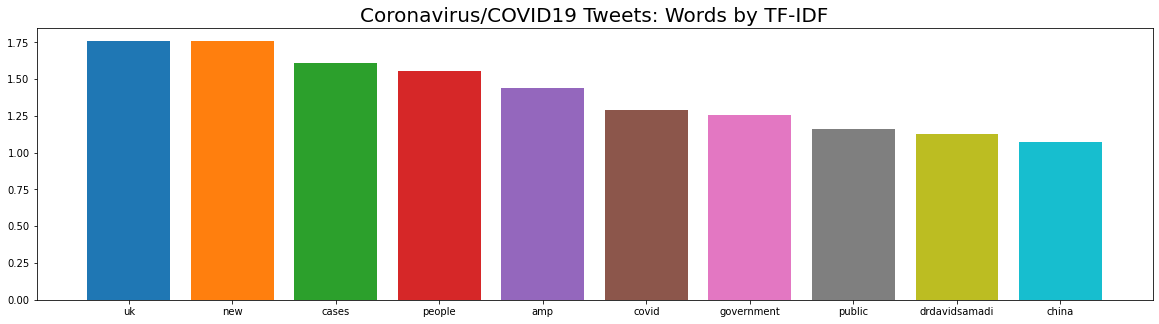

In [5]:
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
cmap = plt.cm.tab10
plt.bar(indexes, values, color=cmap(np.arange(len(df)) % cmap.N))
plt.xticks(indexes, labels)
plt.title('Coronavirus/COVID19 Tweets: Words by TF-IDF', fontsize=20)
plt.show()

### Home-made dictionary (tweets about Canadian issues)

In [6]:
canadian_dictionary = ['vene']
df[df.text.str.lower().str.contains('|'.join(canadian_dictionary))].text

Series([], Name: text, dtype: object)

### Sentiment analysis with VADER (Valence Aware Dictionary and sEntiment Reasoner) 

- **Resource** https://github.com/cjhutto/vaderSentiment

- **Paper** [Hutto, C., & Gilbert, E. (2014, May). Vader: A parsimonious rule-based model for sentiment analysis of social media text. In Proceedings of the International AAAI Conference on Web and Social Media (Vol. 8, No. 1).](https://ojs.aaai.org/index.php/ICWSM/article/download/14550/14399)

In [7]:
from collections import Counter 

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
counter = Counter(sid.lexicon) 

# Finding 20 highest values 
print ('\nMost positive words')
highest = counter.most_common()[0:10]
for entry in highest: 
  print(entry[0]," :",entry[1]," ") 

# Finding 20 lowest values 
print ('\nMost negative words')
lowest = counter.most_common()[-10:-1]
for entry in lowest[:10]: print(entry[0]," :",entry[1]," ") 


Most positive words
aml  : 3.4  
ilu  : 3.4  
ily  : 3.4  
magnificently  : 3.4  
lya  : 3.3  
ecstacy  : 3.3  
euphoria  : 3.3  
sweetheart  : 3.3  
143  : 3.2  
best  : 3.2  

Most negative words
rapers  : -3.6  
terrorism  : -3.6  
fu  : -3.7  
kill  : -3.7  
murder  : -3.7  
rape  : -3.7  
terrorist  : -3.7  
raping  : -3.8  
slavery  : -3.8  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Compute VADER scores
df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >0 else 'neg' if c <0 else 'neu')
df[['url','text','scores','compound','comp_score']].head(100)

,url,text,scores,compound,comp_score
1,https://twitter.com/_/status/1346523549096357890,Surprise!!\nWHO Chief 'Very Disappointed' Chin...,"{'neg': 0.198, 'neu': 0.697, 'pos': 0.105, 'co...",-0.4361,neg
2,https://twitter.com/_/status/1346523548987367426,Researchers warn of brain damage from coronavi...,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp...",-0.5574,neg
4,https://twitter.com/_/status/1346523551042576386,RT @WelshGovernment: In Wales we introduced na...,"{'neg': 0.084, 'neu': 0.916, 'pos': 0.0, 'comp...",-0.1901,neg
5,https://twitter.com/_/status/1346523551210348548,RT @AyoCaesar: London alone has had thousands ...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.2500,neg
6,https://twitter.com/_/status/1346523551722037249,RT @dbongino: Explosive new reporting about th...,"{'neg': 0.26, 'neu': 0.65, 'pos': 0.09, 'compo...",-0.6705,neg
...,...,...,...,...,...
180,https://twitter.com/_/status/1346523679186968578,RT @Hephaestus7: ‘Truly out of touch’: Tory mi...,"{'neg': 0.138, 'neu': 0.745, 'pos': 0.117, 'co...",-0.1027,neg
181,https://twitter.com/_/status/1346523679979675649,RT @IndependentSage: ➡️ 1 in 50 people in Engl...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
183,https://twitter.com/_/status/1346523681560924162,RT @SkySportsNews: BREAKING: The Premier Leagu...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.5574,pos
184,https://twitter.com/_/status/1346523682194272256,RT @drdavidsamadi: Head lice drug ivermectin i...,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.4019,pos


### Sentiment analysis with LIWC (Linguistic Inquiry and Word Count) 

- **Official (non-free) dictionary:** http://liwc.wpengine.com/ 

- **Available copy:** https://github.com/usc-sail/mica-text-characternetworks/blob/master/LIWC/LIWC2007_English131104.dic

- **Python library:** https://pypi.org/project/liwc/

- **Paper:** Pennebaker, J. W., Francis, M. E., & Booth, R. J. (2001). Linguistic inquiry and word count: LIWC 2001. Mahway: Lawrence Erlbaum Associates, 71(2001), 2001.

In [9]:
# Initialize the LIWC parser
!pip install liwc
import liwc
import urllib

# Load available copy
url = "https://raw.githubusercontent.com/usc-sail/mica-text-characternetworks/master/LIWC/LIWC2007_English131104.dic"
infile = urllib.request.urlopen(url)

# Remove badly formatted entries
outfile = open('liwc.dic', 'w') 
outfile.writelines([line.decode("utf-8") for line in infile if not '/' in str(line)]) 
outfile.close()

# Load dictionary
parse, category_names = liwc.load_token_parser('liwc.dic')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# Compute LIWC categories
sample_text = "Today's coronavirus stats in Alabama: 5,498 new COVID-19 cases, more than 3,000 hospitalizations. https://t.co/lAWmpt8xwj"
words = tokenizer.tokenize(sample_text)
for word in words:
  for category in parse(word):
    print (word,category)

in funct
in preps
in space
in relativ
new time
new relativ
more funct
more quant
than funct
than preps
hospitalizations bio
hospitalizations health


### Other dictionaries

Popular lexicons in Web Intelligence are:

- **ANEW (and derived):** Bradley, M. M., & Lang, P. J. (1999). Affective norms for English words (ANEW): Instruction manual and affective ratings (Vol. 30, No. 1, pp. 25-36). Technical report C-1, the center for research in psychophysiology, University of Florida. https://github.com/JULIELab/MEmoLon

- **NRC-VAD:** Obtaining Reliable Human Ratings of Valence, Arousal, and Dominance for 20,000 English Words. Saif M. Mohammad. In Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics, Melbourne, Australia, July 2018. https://github.com/ryanjgallagher/shifterator/tree/master/shifterator/lexicons/NRC-VAD

- **SocialSent:** William L. Hamilton, Kevin Clark, Jure Leskovec, and Dan Jurafsky. Inducing Domain-Specific Sentiment Lexicons from Unlabeled Corpora. Proceedings of EMNLP, 2016. Available at https://github.com/ryanjgallagher/shifterator/tree/master/shifterator/lexicons/SocialSent-Reddit

among many others! Check this [extensive list](https://github.com/laugustyniak/awesome-sentiment-analysis#data) and find the many other available resources on the Internet!

# Hands-on!

Load a dataset of your interest (tweets or any other corpus of documents) and:

* Identify the most positive and negative documents (try different pre-processing strategies such as tokenizers)

* Detect the most frequent words between positive and negative and show them with a word cloud with two colors to distinguish them (or even word shifts)

* Detect categories of emotions beyond polar sentiments using LIWC and/or ANEW

* ... (be creative!)

If you managed to address these task using dictionaries, now consider testing pre-trained models like https://github.com/cardiffnlp/tweetnlp (among the many models available at Hugging Face https://huggingface.co/models)
